# Nuclear Power Reactor and Nuclear Energy Share in the World 2019
### *Source: IAEA*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

file_dir = "file:///C:/Users/ABEDNEGO/npp_ww_data/power reactor by countries.csv"
df_npp = pd.read_csv(file_dir)
#df_npp.set_index('C_code', inplace=True)

In [2]:
df_npp0 = df_npp.replace(np.nan, 0)
df_npp.drop([34], inplace=True)
df_npp0

,C_code,Country,Op_npp_no,OP_net_cap_MWe,Cstr_npp_no,Cstr_net_cap_MWe,TWh_supplied,Nat_elec_pct
0,ar,Argentina,3.0,1641.0,1.0,25.0,7.9,5.9
1,am,Armenia,1.0,375.0,0.0,0.0,2.0,27.8
2,bd,Bangladesh,0.0,0.0,2.0,2160.0,0.0,0.0
3,by,Belarus,0.0,0.0,2.0,2220.0,0.0,0.0
4,be,Belgium,7.0,5930.0,0.0,0.0,41.4,47.6
5,br,Brazil,2.0,1884.0,1.0,1340.0,15.2,2.7
6,bg,Bulgaria,2.0,2006.0,0.0,0.0,15.9,37.5
7,ca,Canada,19.0,13554.0,0.0,0.0,94.9,14.9
8,cn,China,48.0,45518.0,11.0,10564.0,330.1,4.9
9,cz,Czech Republic,6.0,3932.0,0.0,0.0,28.6,35.2


## Operating and  Under Construction NPP Number by Countries

In [3]:
df_10 = df_npp.sort_values(['Op_npp_no'], ascending=False).head(10)
df_10.reset_index(inplace=True, drop=True) # reset index after sort
# sum the total number of reactor from top 10 countries
df_10 = df_10.append(df_10.sum(numeric_only=True), ignore_index=True)
# add the total number of reactor worldwide
df_10 = df_10.append(df_npp0.iloc[34])

df_t = df_10.loc[[10, 34], ['Country', 'Op_npp_no', 'Cstr_npp_no']]
df_t.set_index('Country', inplace=True)
df_t = df_t.transpose()
df_t['Other Countries'] = df_t['TOTAL'] - df_t[np.nan]
df_t.drop(['TOTAL', np.nan], axis=1, inplace=True)
df_t = df_t.transpose()
df_t.reset_index(inplace=True)

df_10.drop([10, 34], inplace=True)
df_num = df_10.loc[:, ['Country', 'Op_npp_no', 'Cstr_npp_no']]
df_num = df_num.replace(np.nan, 0)
df_num = df_num.append(df_t)
df_num.reset_index(inplace=True, drop=True)
df_num = df_num.set_index('Country')
df_num

,Op_npp_no,Cstr_npp_no
Country,,
United States of America,96.0,2.0
France,58.0,1.0
China,48.0,11.0
Russia,38.0,4.0
Japan,33.0,2.0
South Korea,24.0,4.0
India,22.0,7.0
Canada,19.0,0.0
Ukraine,15.0,2.0


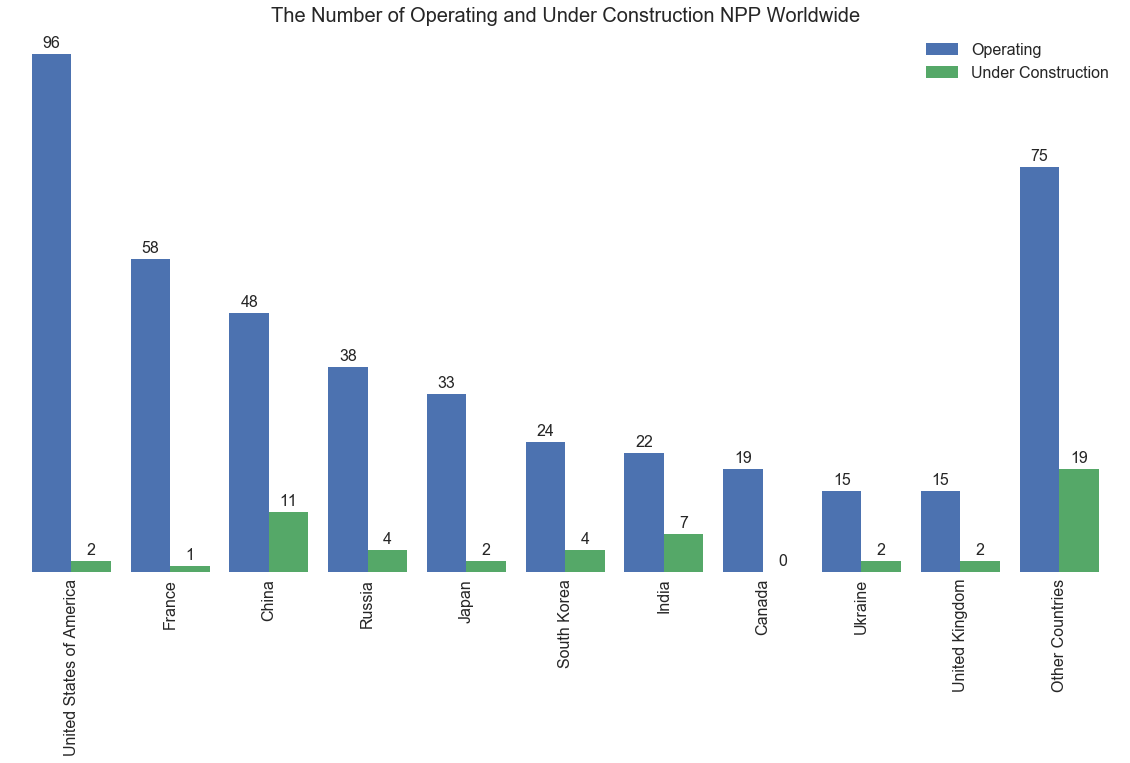

In [4]:
mpl.style.use('seaborn')
ax = df_num.plot(kind='bar', width=0.8, figsize=(20,10), fontsize=16)
ax.set_title("The Number of Operating and Under Construction NPP Worldwide", size=20)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(str(int(height)), xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", 
                ha='center', va='bottom', fontsize=16)

ax.set_facecolor('w')
ax.legend(labels=['Operating', 'Under Construction'], fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
ax.set_xlabel('')

plt.show()

## Operating and  Under Construction NPP Net Capacity by Countries

In [5]:
#df_10.drop([10, 34], inplace=True)
df_10 = df_10.sort_values(['OP_net_cap_MWe'], ascending=False)
df_10 = df_10.append(df_10.sum(numeric_only=True), ignore_index=True)
df_10 = df_10.append(df_npp0.iloc[34])
df_t = df_10.loc[[10, 34], ['Country', 'OP_net_cap_MWe', 'Cstr_net_cap_MWe']]
df_t.set_index('Country', inplace=True)
df_t = df_t.transpose()
df_t['Other Countries'] = df_t['TOTAL'] - df_t[np.nan]
df_t.drop(['TOTAL', np.nan], axis=1, inplace=True)
df_t = df_t.transpose()
df_t.reset_index(inplace=True)

df_10.drop([10, 34], inplace=True)
df_cap = df_10.loc[:, ['Country', 'OP_net_cap_MWe', 'Cstr_net_cap_MWe']]
df_cap = df_cap.replace(np.nan, 0)
df_cap = df_cap.append(df_t)
df_cap.reset_index(inplace=True, drop=True)
df_cap = df_cap.set_index('Country')
df_cap

,OP_net_cap_MWe,Cstr_net_cap_MWe
Country,,
United States of America,98152.0,234.0
France,63130.0,1630.0
China,45518.0,10564.0
Japan,31679.0,2653.0
Russia,28437.0,4525.0
South Korea,23172.0,5360.0
Canada,13554.0,0.0
Ukraine,13107.0,70.0
United Kingdom,8923.0,260.0


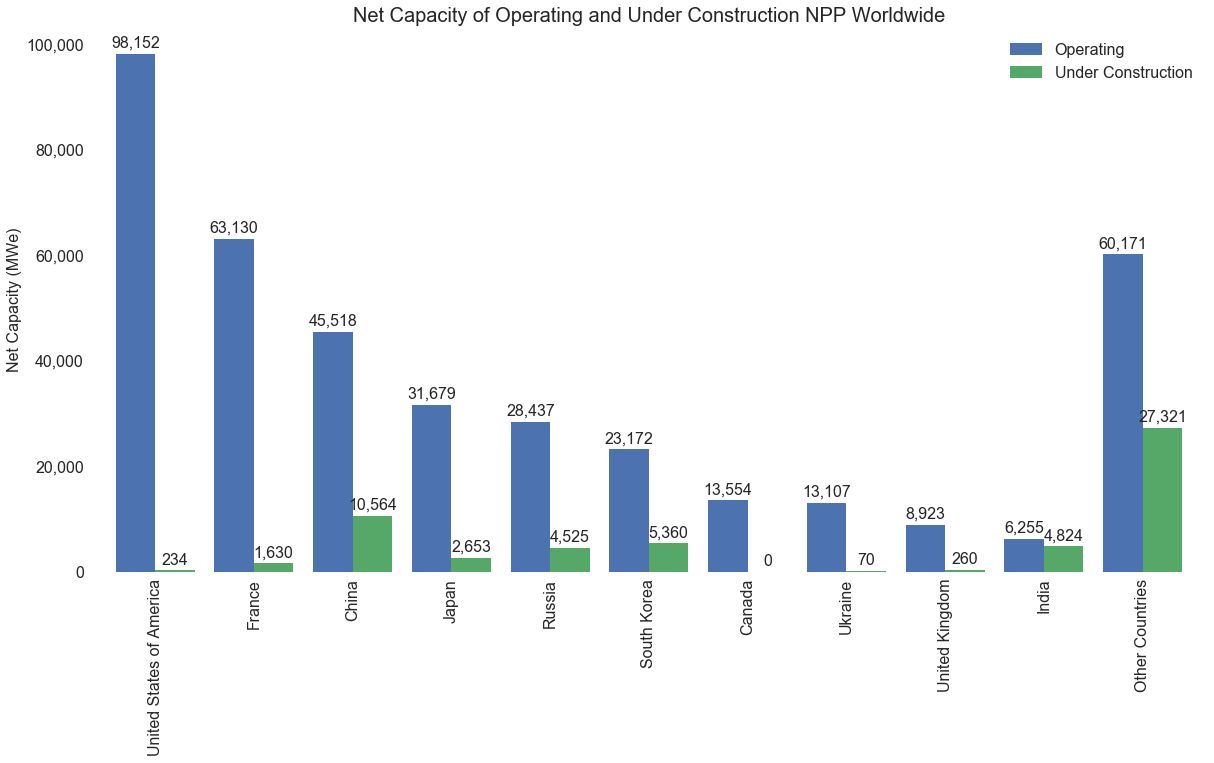

In [6]:
mpl.style.use('seaborn')
ax = df_cap.plot(kind='bar', width=0.8, figsize=(20,10), fontsize=16)
ax.set_title("Net Capacity of Operating and Under Construction NPP Worldwide", size=20)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(int(height), ','), xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", 
                ha='center', va='bottom', fontsize=16)

ax.set_facecolor('w')
ax.legend(labels=['Operating', 'Under Construction'], fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('Net Capacity (MWe)', fontsize=16)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc:"{:,}".format(int(x))))

plt.show()

## Nuclear Energy National Percentage Map

In [7]:
import folium

world_geo = r'world_countries.json'
world_map = folium.Map(location=[0, 0], zoom_start=2)

threshold_scale = np.linspace(0,
                              df_npp['Nat_elec_pct'].max() + 1,
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list

world_map.choropleth(
    geo_data=world_geo,
    data=df_npp,
    columns=['Country', 'Nat_elec_pct'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='PuBu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='National Electricity Percentage (%)'
)

# display map
world_map